In [1]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

[Text(0.5, 1.0, 'Iris data PCA projection')]

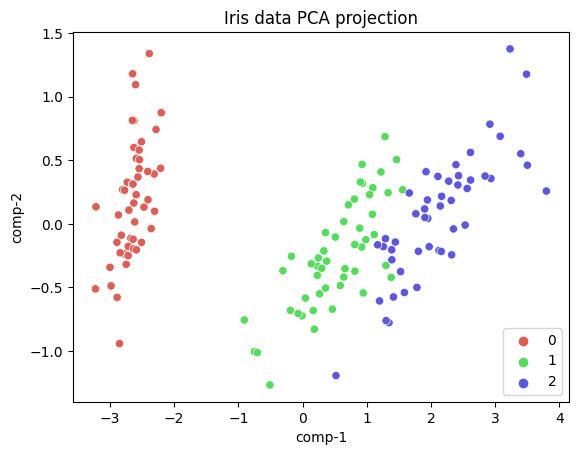

In [2]:
pca = PCA(n_components = 2, random_state = 1)
z = pca.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

sns.scatterplot(x = "comp-1", y = "comp-2", hue = df.y.tolist(),
                palette = sns.color_palette("hls", 3),
                data = df).set(title = "Iris data PCA projection")

[Text(0.5, 1.0, 'Iris data SparsePCA projection')]

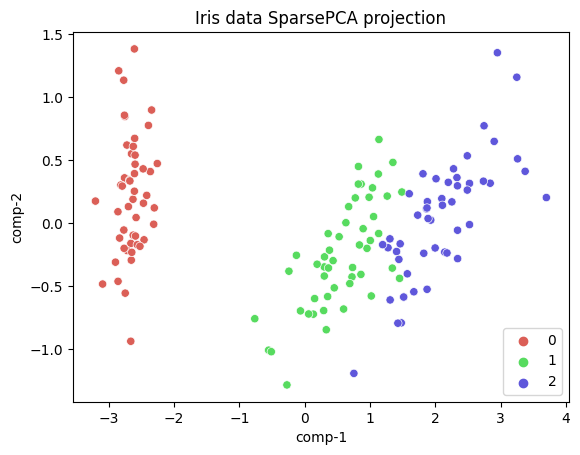

In [3]:
spca = SparsePCA(n_components = 2, random_state = 1)
z = spca.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

sns.scatterplot(x = "comp-1", y = "comp-2", hue = df.y.tolist(),
                palette = sns.color_palette("hls", 3),
                data = df).set(title = "Iris data SparsePCA projection")

In [4]:
pca = PCA(n_components = 4, random_state = 1)
pca.fit_transform(x)
pca_df = pd.DataFrame(pca.components_.T, columns = ["comp-1", "comp-2", "comp-3", "comp-4"], index = iris.feature_names)
pca_df.style.set_caption("PCA Loadings for first four PCs")

,comp-1,comp-2,comp-3,comp-4
sepal length (cm),0.361387,0.656589,-0.582030,-0.315487
sepal width (cm),-0.084523,0.730161,0.597911,0.319723
petal length (cm),0.856671,-0.173373,0.076236,0.479839
petal width (cm),0.358289,-0.075481,0.545831,-0.753657


In [5]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [6]:
spca = SparsePCA(n_components = 4, random_state = 1)
spca.fit_transform(x)
spca_df = pd.DataFrame(spca.components_.T, columns = ["comp-1", "comp-2", "comp-3", "comp-4"], index = iris.feature_names)
spca_df.style.set_caption("SPCA Loadings for first four PCs")

,comp-1,comp-2,comp-3,comp-4
sepal length (cm),0.000000,0.000000,1.000000,0.000000
sepal width (cm),0.000000,1.000000,-0.000000,0.000000
petal length (cm),1.000000,0.000000,-0.000000,0.000000
petal width (cm),0.000000,0.000000,-0.000000,1.000000


In [7]:
import numpy as np
t_spca = spca.transform(x)
p_spca = spca.components_.T
t_spca_qr = np.linalg.qr(t_spca) 
r = t_spca_qr[1]

# compute adjusted variance
variance = []
for i in range(4):
    variance.append(np.square(r[i][i]))
variance = np.array(variance)
variance/np.sum(variance)

array([0.91197023, 0.04539153, 0.03207093, 0.01056731])